In [1]:
# 시각화 모듈 import
import matplotlib.pyplot as plt
# Import datasets and performance metrics
from sklearn import datasets, metrics

#KNN Classification
import numpy as np
import math
%matplotlib inline

In [2]:
# The handwritten digits dataset (8 x 8 image)
digits = datasets.load_digits()

In [3]:
# Target
images_and_labels = list(zip(digits.images, digits.target))

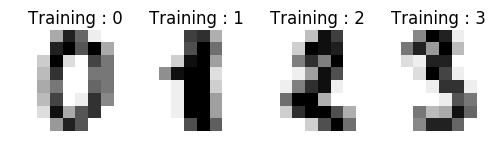

In [4]:
# Visualization of 4 images
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index+1) # 2 x 4의 subplot 위치를 할당하고, 각 image를 할당해서 plot합니다.
    plt.axis('off')# 축 없음
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training : %i' % (label))

In [5]:
images_and_labels[1]

(array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
        [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
        [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1)

In [6]:
class NearestNeighbor:
    def __init__(self):
        pass        
    
    def train(self, X, Y):
        "X : N x D training data set"
        "Y : N x 1 label"
        self.Xtr = X
        self.Ytr = Y
    
    def predict(self, X):
        "X : M x D test data set"
        num_test = X.shape[0] # 행의 갯수
        Ypred = np.zeros(num_test, dtype = self.Ytr.dtype) # 먼저 0으로 가득 채웁니다.
        
        # 모든 테스트에 대하여
        for i in np.arange(len(X)):
            print(i, '\n')
            distance = np.zeros(len(self.Xtr))
            for j in np.arange(len(self.Xtr)):
                distance[j] = np.sum(np.abs(self.Xtr[j] - X[i]))
            
            min_index = np.argmin(distance) # Training data와 Test data 간 L1 dist를 구함
            Ypred[i] = self.Ytr[min_index]
            
        return Ypred

In [7]:
data = np.array(images_and_labels)
# training data / split
# Randomly shuffle  the index
random_indices = np.random.permutation(len(data))
# Set a cutoff for how many items we want in the test set(in the case of 1/3 of the items)
test_cutoff = math.floor(len(data)/3)
# Generate the test set by taking  the first 1/3 of the randomly shuffled indices.
ts = data[random_indices[:test_cutoff]]
# Generate the train set with the rest of the data.
tr = data[random_indices[test_cutoff:]]

# Object
nn = NearestNeighbor()

# training
nn.train(tr[:,0], tr[:,1])
Ypred = nn.predict(ts[:,0])

0 

1 

2 

3 

4 

5 

6 

7 

8 

9 

10 

11 

12 

13 

14 

15 

16 

17 

18 

19 

20 

21 

22 

23 

24 

25 

26 

27 

28 

29 

30 

31 

32 

33 

34 

35 

36 

37 

38 

39 

40 

41 

42 

43 

44 

45 

46 

47 

48 

49 

50 

51 

52 

53 

54 

55 

56 

57 

58 

59 

60 

61 

62 

63 

64 

65 

66 

67 

68 

69 

70 

71 

72 

73 

74 

75 

76 

77 

78 

79 

80 

81 

82 

83 

84 

85 

86 

87 

88 

89 

90 

91 

92 

93 

94 

95 

96 

97 

98 

99 

100 

101 

102 

103 

104 

105 

106 

107 

108 

109 

110 

111 

112 

113 

114 

115 

116 

117 

118 

119 

120 

121 

122 

123 

124 

125 

126 

127 

128 

129 

130 

131 

132 

133 

134 

135 

136 

137 

138 

139 

140 

141 

142 

143 

144 

145 

146 

147 

148 

149 

150 

151 

152 

153 

154 

155 

156 

157 

158 

159 

160 

161 

162 

163 

164 

165 

166 

167 

168 

169 

170 

171 

172 

173 

174 

175 

176 

177 

178 

179 

180 

181 

182 

183 

184 



In [8]:
print("Accuracy : %.2f%%" % (np.sum(Ypred == ts[:,1])/len(Ypred)*100))

Accuracy : 98.33%
